In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
df = pd.read_excel('output_data_2020.xlsx', index_col=None)

In [71]:
df

,Unnamed: 0,date,fixing I course
0,0,2019-08-02 01:00:00,243.28
1,1,2019-08-02 02:00:00,236.99
2,2,2019-08-02 03:00:00,235.00
3,3,2019-08-02 04:00:00,230.00
4,4,2019-08-02 05:00:00,228.95
...,...,...,...
10986,10988,2020-11-01 20:00:00,189.75
10987,10989,2020-11-01 21:00:00,190.00
10988,10990,2020-11-01 22:00:00,195.26
10989,10991,2020-11-01 23:00:00,192.88


In [72]:
del df['Unnamed: 0']

In [73]:
df.columns

Index(['date', 'fixing I course'], dtype='object')

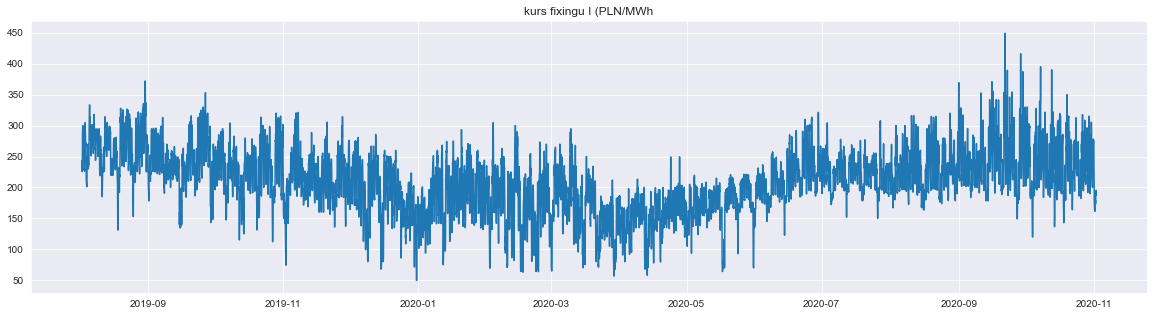

In [74]:
plt.figure(figsize=(20,5))
plt.plot(df['date'], df['fixing I course'])
plt.title("kurs fixingu I (PLN/MWh")
params = {"ytick.color" : "w",
          "xtick.color" : "white",
          "axes.labelcolor" : "white",
          "axes.edgecolor" : "white"
        }
plt.rcParams.update(params)
plt.show()

#### ARIMA Model (Auto Regression)

In [75]:
from statsmodels.tsa.ar_model import AutoReg, ar_select_order

In [76]:
df

,date,fixing I course
0,2019-08-02 01:00:00,243.28
1,2019-08-02 02:00:00,236.99
2,2019-08-02 03:00:00,235.00
3,2019-08-02 04:00:00,230.00
4,2019-08-02 05:00:00,228.95
...,...,...
10986,2020-11-01 20:00:00,189.75
10987,2020-11-01 21:00:00,190.00
10988,2020-11-01 22:00:00,195.26
10989,2020-11-01 23:00:00,192.88


In [85]:
df['date'] = pd.to_datetime(df['date'], unit='h') 

In [88]:
sns.set_style('darkgrid')
pd.plotting.register_matplotlib_converters()
sns.mpl.rc('figure', figsize=(12,6))
fig, ax = plt.subplots()

model = AutoReg(df['fixing I course'], 24)
model_fit = model.fit()

train_df = df.iloc[:2000]
test_df = df.iloc[2000:2500]

train_model = AutoReg(train_df['fixing I course'], 450).fit()
start = len(train_df)
end = len(train_df) + len(test_df) - 1
prediction = train_model.predict(start=start, end=end, dynamic=True)

ax = test_df.plot(ax=ax)
ax = prediction.plot(ax=ax)


ValueError: view limit minimum -36863.62215282527 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

<Figure size 864x432 with 1 Axes>